In [3]:
import pandas as pd
import json

#TRATAMENTO DOS DADOS

Confirmando se os arquivos estão funcionando corretamente

In [4]:
dfOrders = pd.read_csv('synthetic_orders_full.csv')



In [5]:
print("Primeiras linhas da tabela pedidos")
dfOrders.head(10)

Primeiras linhas da tabela pedidos


,id,restaurant_id,customer_id,order_value,delivery_time_minutes,rating,nps_score,created_at,Data,Hora,dia_da_semana,hora_minutos,dia_da_semana_text
0,fad161ca-be94-4240-ab02-80a4adc6cdbb,f39c8476-57b9-4d64-a029-41f314768ca1,6c405ee8-0e56-4275-b6c0-2c282d26b6c3,62.74,32.44,4,70.91,2025-04-18 14:55:47,2025-04-18,14:55:47,5,895.78,Sexta-feira
1,0f65a0c7-13a8-4aa3-9afc-a958259dca84,1a1879cf-3034-4022-8b74-7db1833e3ce1,dd48f4fa-c351-48e5-bbcf-0da511016176,191.28,29.44,3,52.02,2025-02-07 17:44:04,2025-02-07,17:44:04,5,1064.07,Sexta-feira
2,a5352972-4582-4782-a543-6e4ac2874d34,e44b5824-a8cc-421a-879e-dbc4f8a216bd,5b91dcad-00bf-4966-9e11-f30c4ddd29fe,42.35,10.97,5,100.00,2024-05-15 19:25:17,2024-05-15,19:25:17,3,1165.28,Quarta-feira
3,a1f972c3-d6e3-4274-8460-4245d64c791a,cb6b0111-2151-4f71-b874-42aaf07f9352,faa015a2-465b-42a4-913c-37ed889104fe,138.80,48.92,2,26.42,2024-07-26 17:31:23,2024-07-26,17:31:23,5,1051.38,Sexta-feira
4,97572463-d4a8-4105-b6cf-9659576a5718,85467164-ea14-461a-ba43-ebf2d55dd845,36ea02dd-aaec-46a6-bc8a-8487a12c6710,96.47,4.00,4,79.53,2024-04-01 20:21:34,2024-04-01,20:21:34,1,1221.57,Segunda-feira
5,7bebfb3c-9084-495b-9d39-41217865df81,854d1d3a-6e9f-47c8-a142-78ad437832fe,5ec0358e-5a91-47a5-ba5f-6e2af7cecf5b,106.84,27.29,5,90.94,2024-12-08 05:39:42,2024-12-08,05:39:42,0,339.70,Domingo
6,65d73ac4-f27e-4fb6-b197-190675fae313,658f0286-9e14-4c23-86eb-c251ecc33815,9c060c69-55e5-41f7-bda2-892eac4a6b64,32.88,4.00,5,98.81,2025-06-08 20:21:26,2025-06-08,20:21:26,0,1221.43,Domingo
7,d9848894-858f-41e4-a7b3-696dc7886dff,e23fbade-f251-4f47-ab00-57f8b048e785,88838338-0ce6-471d-bb5e-a0469c78cb5f,40.82,6.43,3,60.62,2025-01-01 18:06:10,2025-01-01,18:06:10,3,1086.17,Quarta-feira
8,37ed46bd-fb87-4220-8357-753e242d5937,3026032c-54f2-4524-afa3-169f023e9cb3,15f57b58-e2f2-4a16-b383-5b21fc492a7b,57.05,38.01,2,46.14,2025-07-09 05:13:54,2025-07-09,05:13:54,3,313.90,Quarta-feira
9,3ea379ae-a6f6-403f-bded-4a3002c7c793,3e64b313-1978-43b5-9cc7-bcc1f5e55844,59ed9a65-a7bf-4eae-abb4-16c05bfc6115,67.13,22.95,4,73.33,2024-02-28 18:08:56,2024-02-28,18:08:56,3,1088.93,Quarta-feira


Separando Data de Horário do pedido

In [6]:
from datetime import datetime


dfOrders['created_at'] = (
    pd.to_datetime(dfOrders['created_at'])
    .dt.tz_localize(None)
    .dt.floor('s')
)

dfOrders['Data'] = dfOrders['created_at'].dt.date
dfOrders['Hora'] = dfOrders['created_at'].dt.time

dfOrders[["Data", "Hora"]].head()

,Data,Hora
0,2025-04-18,14:55:47
1,2025-02-07,17:44:04
2,2024-05-15,19:25:17
3,2024-07-26,17:31:23
4,2024-04-01,20:21:34


In [7]:

dfOrders['Data'] = pd.to_datetime(dfOrders['Data'])
dfOrders['dia_da_semana'] = dfOrders['Data'].dt.day_of_week

In [8]:
dfOrders[['Data', 'dia_da_semana']].head()

,Data,dia_da_semana
0,2025-04-18,4
1,2025-02-07,4
2,2024-05-15,2
3,2024-07-26,4
4,2024-04-01,0


Apresentando os campos que serão utilizados e tratando-os

In [9]:
dfOrders[['order_value', 'delivery_time_minutes', 'Hora', 'dia_da_semana','rating', 'nps_score']].head(10)

,order_value,delivery_time_minutes,Hora,dia_da_semana,rating,nps_score
0,62.74,32.44,14:55:47,4,4,70.91
1,191.28,29.44,17:44:04,4,3,52.02
2,42.35,10.97,19:25:17,2,5,100.00
3,138.80,48.92,17:31:23,4,2,26.42
4,96.47,4.00,20:21:34,0,4,79.53
5,106.84,27.29,05:39:42,6,5,90.94
6,32.88,4.00,20:21:26,6,5,98.81
7,40.82,6.43,18:06:10,2,3,60.62
8,57.05,38.01,05:13:54,2,2,46.14
9,67.13,22.95,18:08:56,2,4,73.33


In [22]:
dfOrders['Hora'] = pd.to_datetime(dfOrders['Hora'], format='%H:%M:%S')

# nova coluna com minutos desde meia-noite
dfOrders['hora_minutos'] = dfOrders['Hora'].dt.hour * 60 + dfOrders['Hora'].dt.minute

print(dfOrders[['Hora', 'hora_minutos']].head())

                 Hora  hora_minutos
0 1900-01-01 14:55:47           895
1 1900-01-01 17:44:04          1064
2 1900-01-01 19:25:17          1165
3 1900-01-01 17:31:23          1051
4 1900-01-01 20:21:34          1221


#ANALISES DE DISPERSÃO

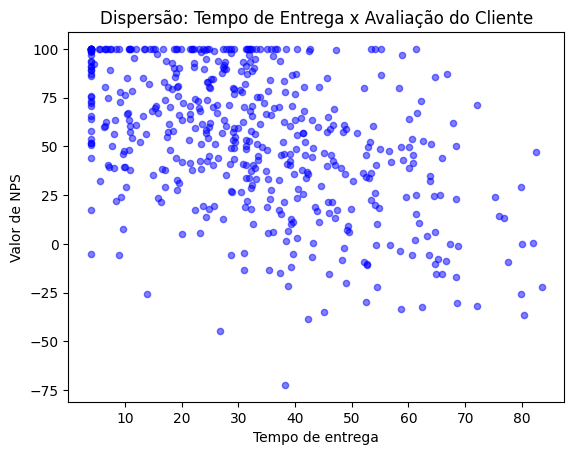

In [11]:
import matplotlib.pyplot as plt
dfOrders.sample(500).plot.scatter(x='delivery_time_minutes', y='nps_score', color='blue', alpha=0.5)
plt.xlabel('Tempo de entrega')
plt.ylabel('Valor de NPS')
plt.title('Dispersão: Tempo de Entrega x Avaliação do Cliente')
plt.show()

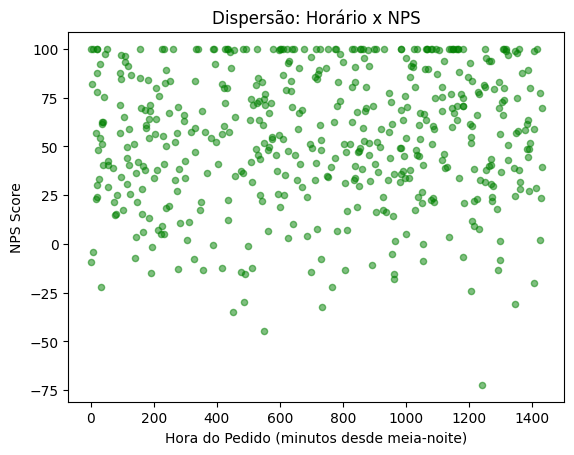

In [12]:
dfOrders.sample(500).plot.scatter(x='hora_minutos', y='nps_score', color='green', alpha=0.5)
plt.xlabel('Hora do Pedido (minutos desde meia-noite)')
plt.ylabel('NPS Score')
plt.title('Dispersão: Horário x NPS')
plt.show()


/tmp/ipython-input-2843988584.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_nps = dfOrders.groupby('dia_da_semana_text')['nps_score'].median()


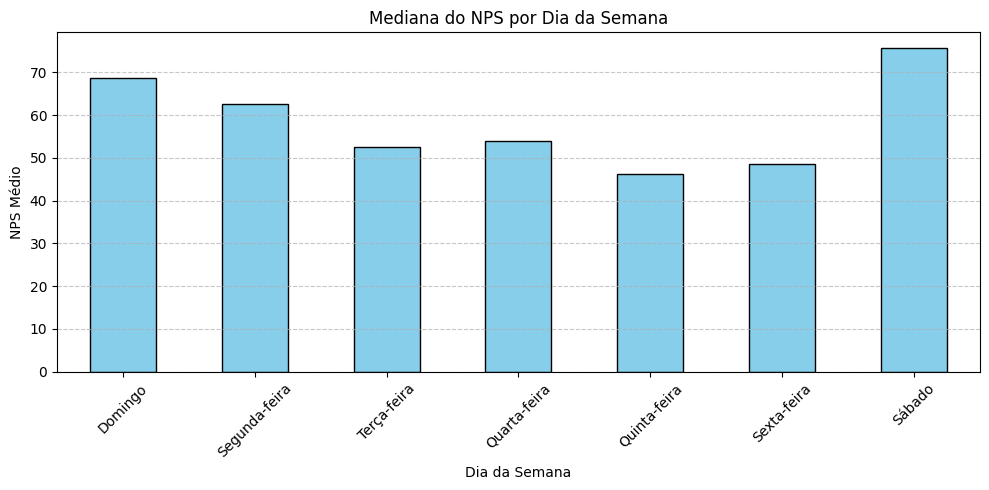

Index(['id', 'restaurant_id', 'customer_id', 'order_value',
       'delivery_time_minutes', 'rating', 'nps_score', 'created_at', 'Data',
       'Hora', 'dia_da_semana', 'hora_minutos', 'dia_da_semana_text'],
      dtype='object')


In [13]:
dias_map = {
    0: 'Domingo',
    1: 'Segunda-feira',
    2: 'Terça-feira',
    3: 'Quarta-feira',
    4: 'Quinta-feira',
    5: 'Sexta-feira',
    6: 'Sábado'
}


dfOrders['dia_da_semana_text'] = dfOrders['dia_da_semana'].map(dias_map)
ordem_dias_lista = list(dias_map.values())

categorical_dtype = pd.CategoricalDtype(categories=ordem_dias_lista, ordered=True)
dfOrders['dia_da_semana_text'] = dfOrders['dia_da_semana_text'].astype(categorical_dtype)

media_nps = dfOrders.groupby('dia_da_semana_text')['nps_score'].median()

plt.figure(figsize=(10, 5))
media_nps.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Mediana do NPS por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('NPS Médio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print(dfOrders.columns)

In [14]:
dfOrders.head()

,id,restaurant_id,customer_id,order_value,delivery_time_minutes,rating,nps_score,created_at,Data,Hora,dia_da_semana,hora_minutos,dia_da_semana_text
0,fad161ca-be94-4240-ab02-80a4adc6cdbb,f39c8476-57b9-4d64-a029-41f314768ca1,6c405ee8-0e56-4275-b6c0-2c282d26b6c3,62.74,32.44,4,70.91,2025-04-18 14:55:47,2025-04-18,1900-01-01 14:55:47,4,895,Quinta-feira
1,0f65a0c7-13a8-4aa3-9afc-a958259dca84,1a1879cf-3034-4022-8b74-7db1833e3ce1,dd48f4fa-c351-48e5-bbcf-0da511016176,191.28,29.44,3,52.02,2025-02-07 17:44:04,2025-02-07,1900-01-01 17:44:04,4,1064,Quinta-feira
2,a5352972-4582-4782-a543-6e4ac2874d34,e44b5824-a8cc-421a-879e-dbc4f8a216bd,5b91dcad-00bf-4966-9e11-f30c4ddd29fe,42.35,10.97,5,100.00,2024-05-15 19:25:17,2024-05-15,1900-01-01 19:25:17,2,1165,Terça-feira
3,a1f972c3-d6e3-4274-8460-4245d64c791a,cb6b0111-2151-4f71-b874-42aaf07f9352,faa015a2-465b-42a4-913c-37ed889104fe,138.80,48.92,2,26.42,2024-07-26 17:31:23,2024-07-26,1900-01-01 17:31:23,4,1051,Quinta-feira
4,97572463-d4a8-4105-b6cf-9659576a5718,85467164-ea14-461a-ba43-ebf2d55dd845,36ea02dd-aaec-46a6-bc8a-8487a12c6710,96.47,4.00,4,79.53,2024-04-01 20:21:34,2024-04-01,1900-01-01 20:21:34,0,1221,Domingo


#DESENVOLVIMENTO DO MODELO DE REGRESSÃO

In [15]:
import numpy as np
from scipy.linalg import lstsq

for col in ['nps_score', 'delivery_time_minutes', 'order_value', 'hora_minutos']:
    dfOrders[col] = pd.to_numeric(dfOrders[col], errors='coerce')

df_model = dfOrders.dropna(subset=['nps_score', 'delivery_time_minutes', 'order_value', 'hora_minutos', 'dia_da_semana']).copy()


X_categorical = pd.get_dummies(df_model['dia_da_semana'], prefix='dia', drop_first=True)


X_continuous = df_model[['delivery_time_minutes', 'order_value', 'hora_minutos']]


X_base = pd.concat([X_continuous, X_categorical], axis=1)


X_base_values_float = X_base.values.astype(np.float64)


X = np.hstack([np.ones((X_base.shape[0], 1)), X_base_values_float])


Y = df_model['nps_score'].values.astype(np.float64).reshape(-1, 1)

print(f"Dimensão da Matriz X: {X.shape}")
print(f"Dimensão do Vetor Y: {Y.shape}")
print(f"Tipo de dado de X: {X.dtype}")
print(f"Tipo de dado de Y: {Y.dtype}")
df_model.to_csv('df_model.csv', index=False)


beta_coefficients, residuals, rank, s = lstsq(X, Y)

Dimensão da Matriz X: (1000, 10)
Dimensão do Vetor Y: (1000, 1)
Tipo de dado de X: float64
Tipo de dado de Y: float64


In [16]:

Y_B = df_model['delivery_time_minutes'].values.reshape(-1, 1)

X_B_continuous = df_model[['order_value', 'hora_minutos']]

X_B_categorical = pd.get_dummies(df_model['dia_da_semana'], prefix='dia', drop_first=True)

X_B_base = pd.concat([X_B_continuous, X_B_categorical], axis=1)

X_B = np.hstack([np.ones((X_B_base.shape[0], 1)), X_B_base.values])

print(f"Dimensão da Matriz X_B: {X_B.shape}")
print(f"Dimensão do Vetor Y_B: {Y_B.shape}")

Dimensão da Matriz X_B: (1000, 9)
Dimensão do Vetor Y_B: (1000, 1)


In [17]:

Y_B = df_model['delivery_time_minutes'].values.astype(np.float64).reshape(-1, 1)

X_B_continuous = df_model[['order_value', 'hora_minutos']]

X_B_categorical = pd.get_dummies(df_model['dia_da_semana'], prefix='dia', drop_first=True)

X_B_base = pd.concat([X_B_continuous, X_B_categorical], axis=1)

X_B_values_float = X_B_base.values.astype(np.float64)

X_B = np.hstack([np.ones((X_B_base.shape[0], 1)), X_B_values_float])

print(f"Dimensão da Matriz X_B: {X_B.shape}")
print(f"Dimensão do Vetor Y_B: {Y_B.shape}")

print(f"Tipo de dado de X_B: {X_B.dtype}")
print(f"Tipo de dado de Y_B: {Y_B.dtype}")

beta_B_coefficients, residuals_B, rank_B, s_B = lstsq(X_B, Y_B)

Dimensão da Matriz X_B: (1000, 9)
Dimensão do Vetor Y_B: (1000, 1)
Tipo de dado de X_B: float64
Tipo de dado de Y_B: float64


##Testando as correlações entre dados

In [18]:
feature_B_names = ['Intercepto'] + list(X_B_base.columns)

print("\n--- Resultados da Regressão Linear (Modelo B: Tempo de Entrega) ---")

coefficients_B_df = pd.DataFrame({
    'Feature': feature_B_names,
    'Coeficiente': beta_B_coefficients.flatten()
})


Y_B_mean = Y_B.mean()
TSS_B = np.sum((Y_B - Y_B_mean)**2)
SSE_B = np.sum(residuals_B**2)
R_squared_B = 1 - (SSE_B / TSS_B)


print(coefficients_B_df)
print(f"\nR-squared do Modelo B (Tempo de Entrega): {R_squared_B:.4f}")


--- Resultados da Regressão Linear (Modelo B: Tempo de Entrega) ---
        Feature  Coeficiente
0    Intercepto    24.263052
1   order_value     0.040062
2  hora_minutos    -0.009730
3         dia_1     8.455335
4         dia_2     9.718233
5         dia_3    12.232670
6         dia_4    22.441234
7         dia_5    23.686532
8         dia_6    -0.917720

R-squared do Modelo B (Tempo de Entrega): -184923.2241


In [19]:
feature_A_names = ['Intercepto', 'delivery_time_minutes', 'order_value', 'hora_minutos'] + list(X_categorical.columns)

print("\n--- Resultados da Regressão Linear (Modelo A: NPS Score) ---")

coefficients_A_df = pd.DataFrame({
    'Feature': feature_A_names,
    'Coeficiente': beta_coefficients.flatten()
})

Y_mean = np.mean(Y)
TSS = np.sum((Y - Y_mean)**2)
SSE = np.sum(residuals**2)
R_squared = 1 - (SSE / TSS)


print(coefficients_A_df)
print(f"\nR-squared do Modelo A (NPS): {R_squared:.4f}")


--- Resultados da Regressão Linear (Modelo A: NPS Score) ---
                 Feature  Coeficiente
0             Intercepto    75.954342
1  delivery_time_minutes    -0.851221
2            order_value     0.051200
3           hora_minutos     0.001035
4                  dia_1     1.751563
5                  dia_2    -0.647113
6                  dia_3     0.000116
7                  dia_4     0.348489
8                  dia_5     0.649796
9                  dia_6     4.378164

R-squared do Modelo A (NPS): -726380.4946


#DESENVOLVIMENTO DA INTERFACE DE PREDIÇÃO

In [20]:
def prever_nps_e_tempo_entrega(valor_pedido, hora_minutos_pedido, dia_da_semana_num, beta_nps, beta_entrega):
    """
    Recebe inputs do usuário e retorna a previsão de Tempo de Entrega e NPS.
NPS.
print
    Args:
        valor_pedido (float): order_value do pedido.
        hora_minutos_pedido (int): hora_minutos do pedido (total de minutos após 00:00).
        dia_da_semana_num (int): 0 (Dom) a 6 (Sáb).
        beta_nps (array): Coeficientes do Modelo A (NPS).
        beta_entrega (array): Coeficientes do Modelo B (Tempo de Entrega).
    """


    dia_dummies = np.zeros(6)
    if dia_da_semana_num > 0 and dia_da_semana_num <= 6:
        dia_dummies[dia_da_semana_num - 1] = 1
    X_B_pred = np.array([1, valor_pedido, hora_minutos_pedido] + list(dia_dummies))

    tempo_entrega_previsto = X_B_pred.dot(beta_entrega)[0]

    X_A_pred = np.array([1, tempo_entrega_previsto, valor_pedido, hora_minutos_pedido] + list(dia_dummies))

    nps_previsto = X_A_pred.dot(beta_nps)[0]

    return tempo_entrega_previsto, nps_previsto


def interface_previsao():
    print("-------------------------------------------------------")
    print("           ✨ Previsão de Performance do Pedido ✨")
    print("-------------------------------------------------------")

    dias_map_text = {
        0: 'Domingo', 1: 'Segunda-feira', 2: 'Terça-feira',
        3: 'Quarta-feira', 4: 'Quinta-feira', 5: 'Sexta-feira', 6: 'Sábado'
    }

    while True:
        try:
            valor_pedido = float(input("Qual o valor total do pedido (R$)? "))
            if valor_pedido >= 0:
                break
            print("Valor inválido. Insira um número positivo.")
        except ValueError:
            print("Entrada inválida. Por favor, insira um número.")

    print("\nDias da semana: (0=Dom, 1=Seg, ..., 6=Sáb)")
    while True:
        try:
            dia_da_semana_num = int(input("Qual o número do dia da semana (0 a 6)? "))
            if 0 <= dia_da_semana_num <= 6:
                break
            print("Número inválido. Insira um número de 0 a 6.")
        except ValueError:
            print("Entrada inválida. Por favor, insira um número inteiro.")

    print("\n--- Horário do Pedido ---")
    while True:
        try:
            hora = int(input("Que horas o pedido foi feito (0 a 23)? "))
            minutos = int(input("E quantos minutos (0 a 59)? "))
            if 0 <= hora <= 23 and 0 <= minutos <= 59:
                hora_minutos_pedido = hora * 60 + minutos
                break
            print("Horário inválido. Horas entre 0-23 e minutos entre 0-59.")
        except ValueError:
            print("Entrada inválida. Por favor, insira números inteiros.")
    try:
        tempo, nps = prever_nps_e_tempo_entrega(
            valor_pedido,
            hora_minutos_pedido,
            dia_da_semana_num,
            beta_nps=beta_coefficients,
            beta_entrega=beta_B_coefficients
        )

        print("\n-------------------------------------------------------")
        print(f"Pedido de R${valor_pedido:.2f} | {dias_map_text[dia_da_semana_num]} às {hora:02d}:{minutos:02d}")
        print("-------------------------------------------------------")
        print(f"⏳ Tempo de Entrega Previsto: {tempo:.2f} minutos")
        print(f"🌟 NPS Score Previsto: {nps:.2f}")
        print("-------------------------------------------------------")

    except NameError as e:
        print(f"\nERRO: {e}")
        print("Certifique-se de que 'beta_coefficients' e 'beta_B_coefficients' foram definidos antes de rodar a interface.")


#INTERFACE DE REGRESSÃO

In [21]:
interface_previsao()

-------------------------------------------------------
           ✨ Previsão de Performance do Pedido ✨
-------------------------------------------------------
Qual o valor total do pedido (R$)? 10

Dias da semana: (0=Dom, 1=Seg, ..., 6=Sáb)
Qual o número do dia da semana (0 a 6)? 10
Número inválido. Insira um número de 0 a 6.
Qual o número do dia da semana (0 a 6)? 4

--- Horário do Pedido ---
Que horas o pedido foi feito (0 a 23)? 10
E quantos minutos (0 a 59)? 10

-------------------------------------------------------
Pedido de R$10.00 | Quinta-feira às 10:10
-------------------------------------------------------
⏳ Tempo de Entrega Previsto: 41.17 minutos
🌟 NPS Score Previsto: 42.40
-------------------------------------------------------
